In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dypac_utils import visu_repro, load_dypac, subject_keys

In [3]:
root_data = '/data/cisl/pbellec/cneuromod_embeddings/xp_202012/repro_friends-s01'

In [4]:
fwhm = (5, 8)
cluster = (20, 20, 50, 50, 300)
state = (60, 120, 150, 300, 900)
list_subject = subject_keys(6)

In [5]:
def parameter_keys(fwhm=[5]):
    cluster = (20, 20, 50, 50, 300)
    state = (60, 120, 150, 300, 900)
    list_keys = []
    for numf in range(len(fwhm)):
        for nump in range(len(cluster)):
            list_keys.append(f'fwhm-{fwhm[numf]}_cluster-{cluster[nump]}_state-{state[nump]}')
    return list_keys

In [19]:
import re
def load_repro(root_data, list_keys, skip_fwhm=True):
    val = np.array([])
    all_label = np.array([])
    type_comp = np.array([])

    for key in list_keys:
        print(key)
        file_repro = os.path.join(root_data, f'Rmatch_{key}.p')
        R = pickle.load(open(file_repro, 'rb'))
        for sub1 in list_subject:
            for sub2 in list_subject:
                match_val = np.max(R[sub1][sub2], axis=1)
                val = np.append(val, match_val)
                if skip_fwhm:
                    label = re.search('.......(.+)', key).group(1)
                else:
                    label = key
                all_label = np.append(all_label, np.repeat(label, match_val.shape[0]))
                if sub1 == sub2:
                    type_comp = np.append(type_comp, np.repeat('intra', match_val.shape[0]))
                else:
                    type_comp = np.append(type_comp, np.repeat('inter', match_val.shape[0]))
    return val, all_label, type_comp

fwhm-5_cluster-20_state-60
fwhm-5_cluster-20_state-120
fwhm-5_cluster-50_state-150
fwhm-5_cluster-50_state-300
fwhm-5_cluster-300_state-900


Text(0.5, 1.0, 'FWHM=5')

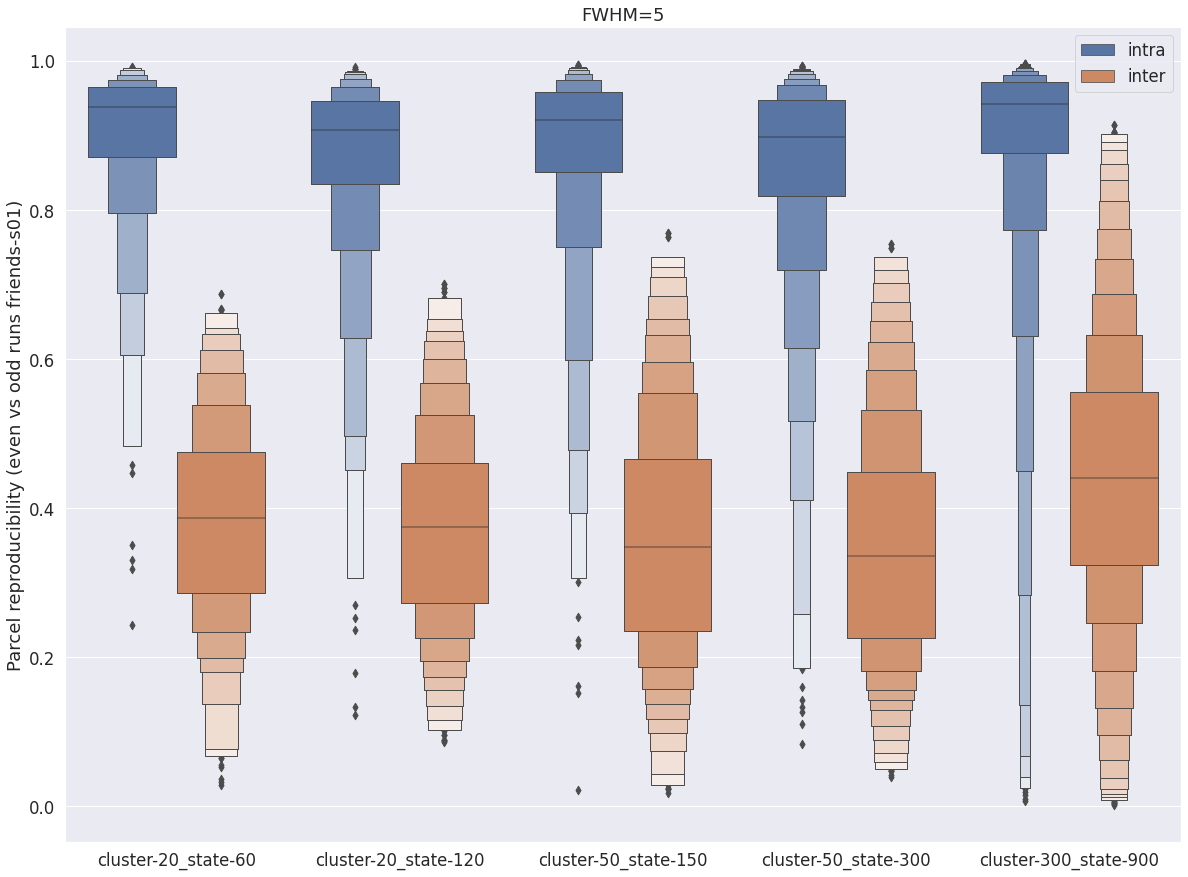

In [20]:
list_keys = parameter_keys([5])
val, all_label, type_comp = load_repro(root_data, list_keys)
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20, 15))
sns.boxenplot(x=all_label, y=val, hue=type_comp, scale='area')
plt.ylabel('Parcel reproducibility (even vs odd runs friends-s01)')
plt.title('FWHM=5')

fwhm-8_cluster-20_state-60
fwhm-8_cluster-20_state-120
fwhm-8_cluster-50_state-150
fwhm-8_cluster-50_state-300
fwhm-8_cluster-300_state-900


Text(0.5, 1.0, 'FWHM=8')

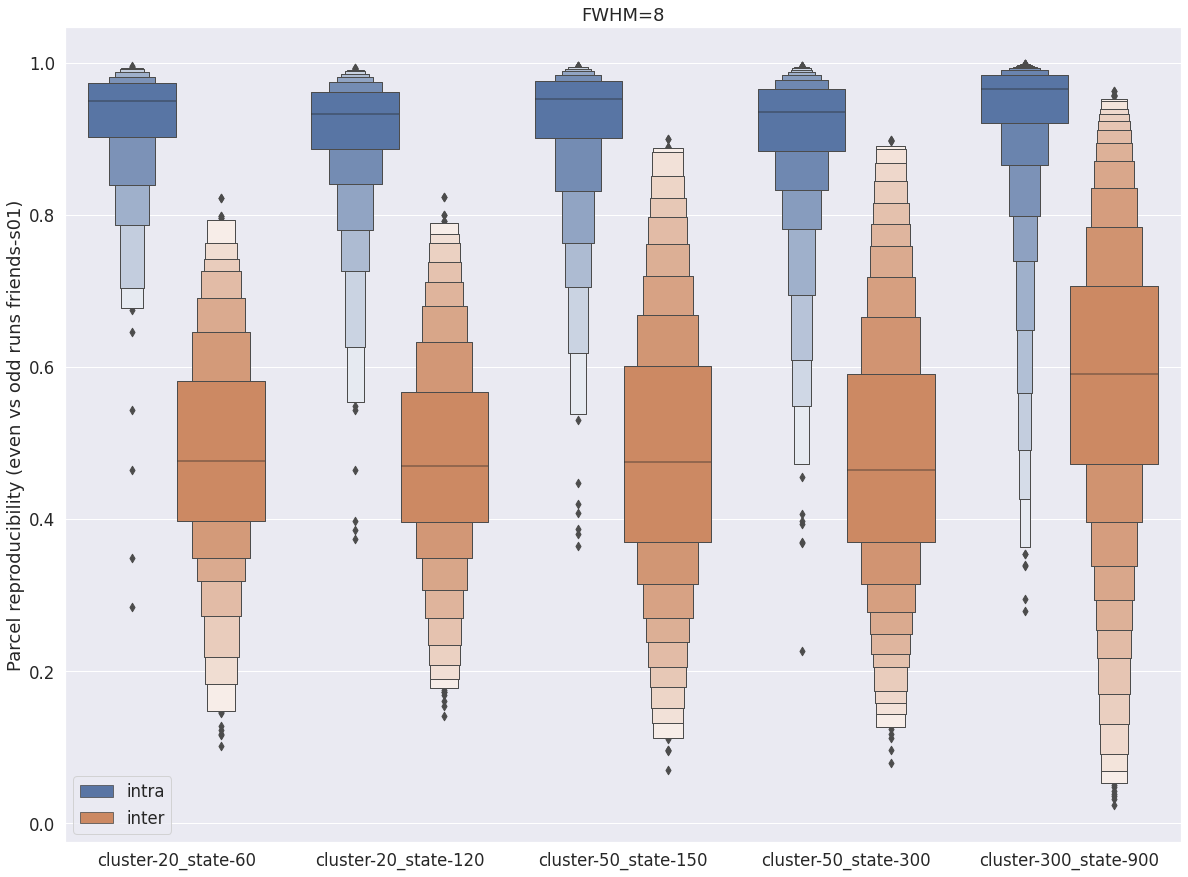

In [22]:
list_keys = parameter_keys([8])
val, all_label, type_comp = load_repro(root_data, list_keys)
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20, 15))
sns.boxenplot(x=all_label, y=val, hue=type_comp, scale='area')
plt.ylabel('Parcel reproducibility (even vs odd runs friends-s01)')
plt.title('FWHM=8')

<AxesSubplot:>

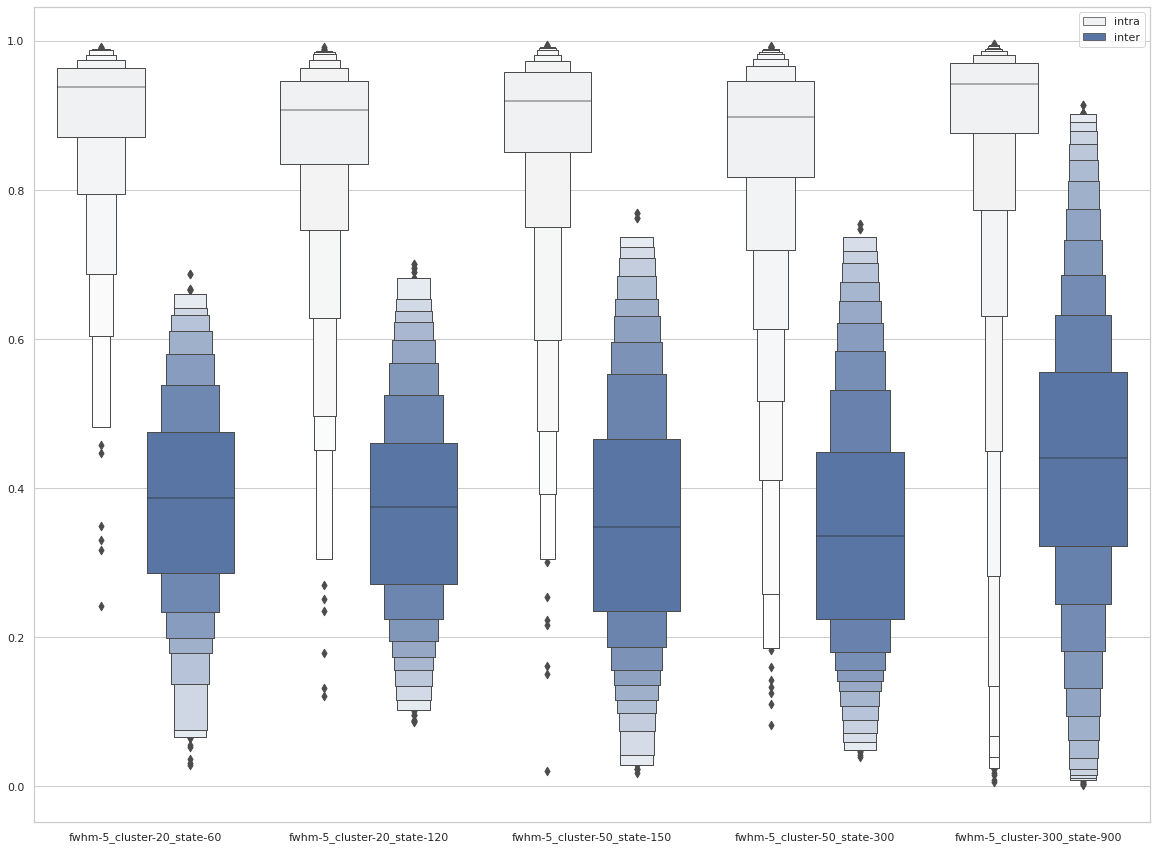

In [14]:
list_keys = parameter_keys([5])
val, all_label, type_comp = load_repro(list_keys)
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20, 15))
sns.boxenplot(x=all_label, y=val, hue=type_comp, scale='area')
plt.ylabel('spatial correlation even vs odd runs friends-s01)')
plt.title('Parcel reproducibility FWHM=5')


In [6]:
fwhm = (5, 8)
cluster = (20, 20, 50, 50, 300)
state = (60, 120, 150, 300, 900)
list_subject = subject_keys(6)

keys = []
for numf in range(2):
    for nump in range(5):
        keys.append(f'fwhm-{fwhm[numf]}_cluster-{cluster[nump]}_state-{state[nump]}')

intra_val = dict.fromkeys(keys)
inter_val = dict.fromkeys(keys)
for ind in range(len(keys)):
    label = keys[ind]
    print(label)
    file_repro = os.path.join(root_data, f'Rmatch_{label}.p')
    R = pickle.load(open(file_repro, 'rb'))
    intra_tmp = np.array([])
    inter_tmp = np.array([])
    for sub1 in list_subject:
        for sub2 in list_subject:
            match_val = np.max(R[sub1][sub2], axis=1)
            if sub1 == sub2:
                intra_tmp = np.append(intra_tmp, match_val)
            else:
                inter_tmp = np.append(inter_tmp, match_val)
    intra_val[label] = intra_tmp
    inter_val[label] = inter_tmp

fwhm-5_cluster-20_state-60
fwhm-5_cluster-20_state-120
fwhm-5_cluster-50_state-150
fwhm-5_cluster-50_state-300
fwhm-5_cluster-300_state-900
fwhm-8_cluster-20_state-60
fwhm-8_cluster-20_state-120
fwhm-8_cluster-50_state-150
fwhm-8_cluster-50_state-300
fwhm-8_cluster-300_state-900


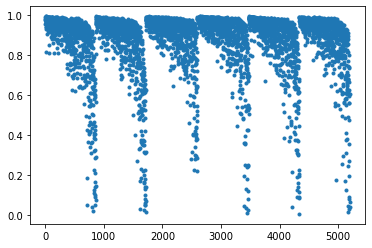

In [27]:
plt.plot(intra_val['fwhm-5_cluster-300_state-900'],'.')

In [29]:
list(intra_val.keys())

['fwhm-5_cluster-20_state-60',
 'fwhm-5_cluster-20_state-120',
 'fwhm-5_cluster-50_state-150',
 'fwhm-5_cluster-50_state-300',
 'fwhm-5_cluster-300_state-900',
 'fwhm-8_cluster-20_state-60',
 'fwhm-8_cluster-20_state-120',
 'fwhm-8_cluster-50_state-150',
 'fwhm-8_cluster-50_state-300',
 'fwhm-8_cluster-300_state-900']

In [43]:
intra = np.array([])
inter = np.array([])
labels_intra = np.array([])
labels_inter = np.array([])
for key in list(intra_val.keys()):
    intra = np.append(intra, intra_val[key])
    labels_intra = np.append(labels_intra, np.repeat(key, intra_val[key].shape[0]))
    inter = np.append(inter, inter_val[key])
    labels_inter = np.append(labels_inter, np.repeat(key, inter_val[key].shape[0]))

In [37]:
labels_intra

array(['fwhm-5_cluster-20_state-60', 'fwhm-5_cluster-20_state-60',
       'fwhm-5_cluster-20_state-60', ..., 'fwhm-8_cluster-300_state-900',
       'fwhm-8_cluster-300_state-900', 'fwhm-8_cluster-300_state-900'],
      dtype='<U32')

In [49]:
sns.boxenplot?

<AxesSubplot:>

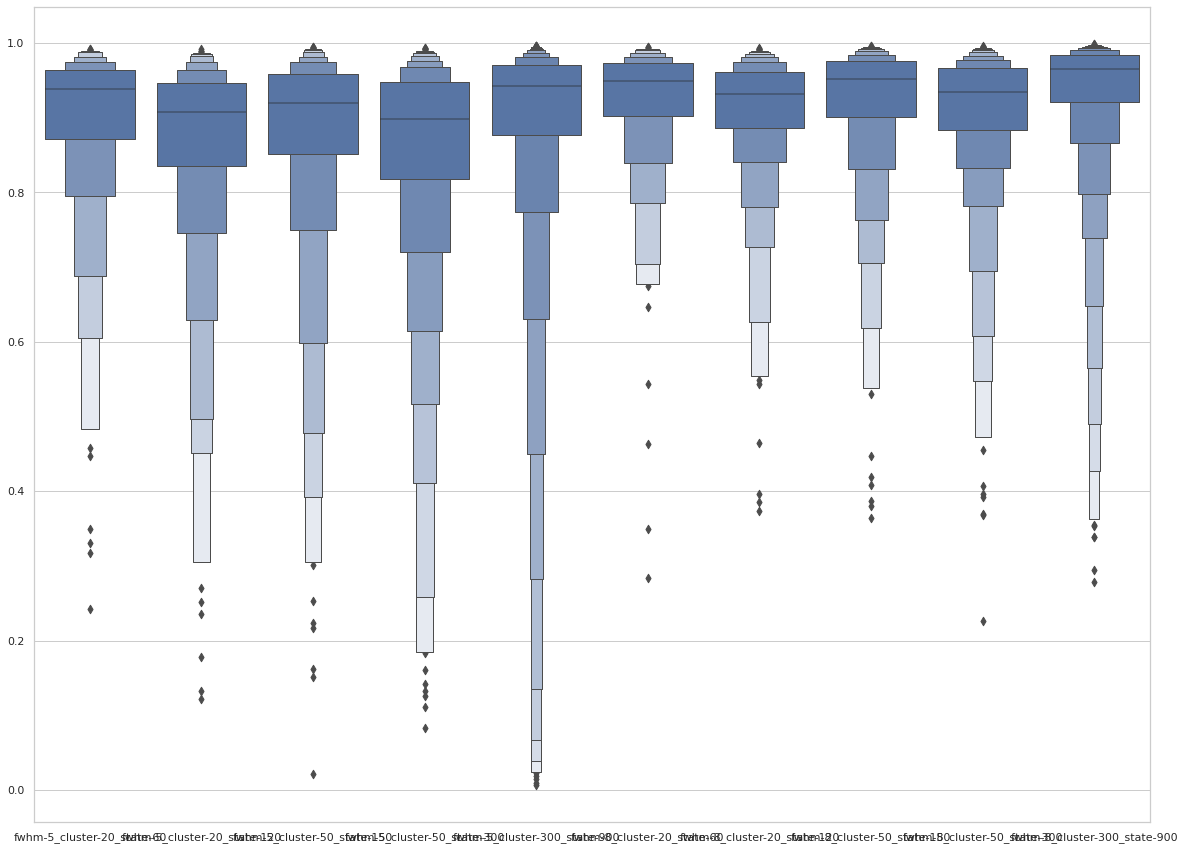

In [50]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(20, 15))
sns.boxenplot(x=labels_intra, y=intra, color='b', scale='area')

<AxesSubplot:>

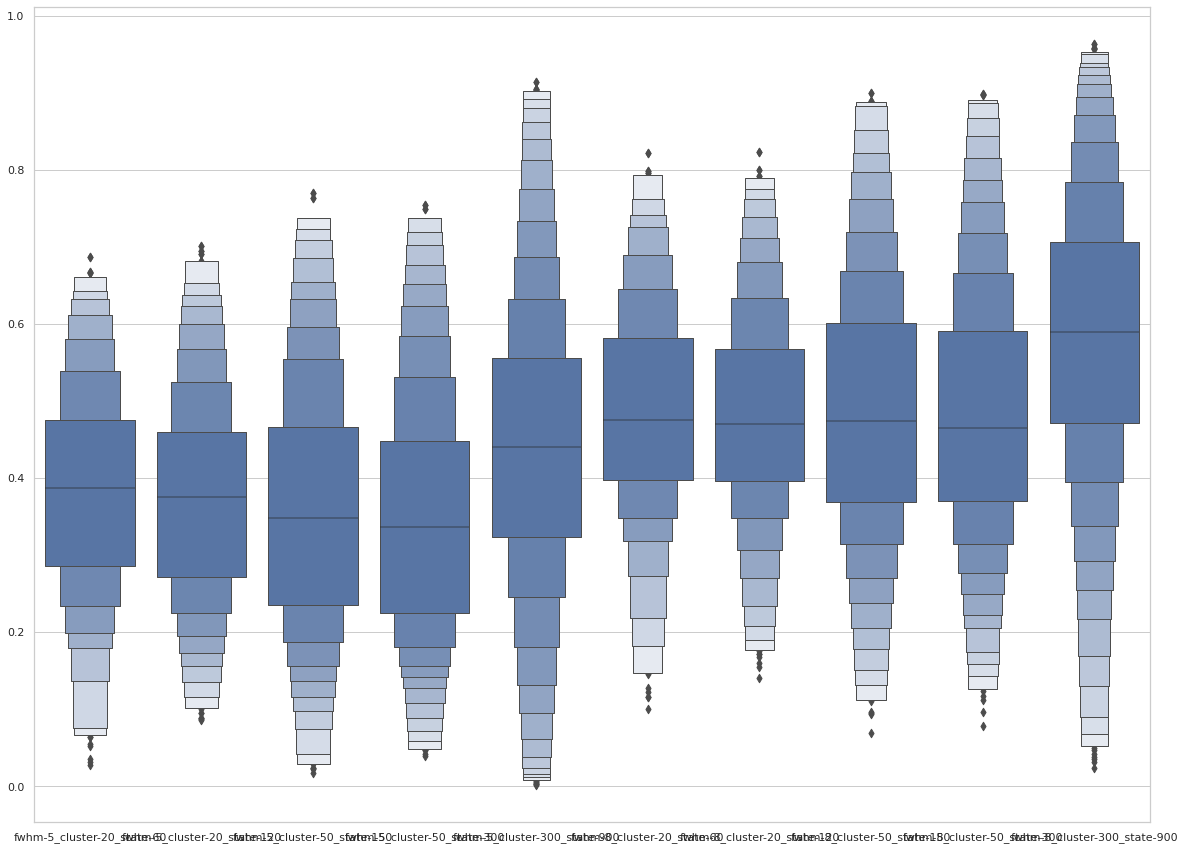

In [51]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(20, 15))
sns.boxenplot(x=labels_inter, y=inter, color='b', scale='area')

In [22]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# fwhm-5 cluster-20 state-60

In [19]:
R = np.load(os.path.join(root_data,'Rmatch_fwhm-5_cluster-50_state-300.npy'))


In [24]:
root_dypac = '/data/cisl/pbellec/cneuromod_embeddings/xp_202011/'
model, mask_img = load_dypac(subject='sub-04', root_data=root_dypac, fwhm=5, cluster=50, state=300)

In [33]:
model.dwell_time.shape()

AttributeError: 'Dypac' object has no attribute 'dwell_time'

In [30]:
model.dwell_time_==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

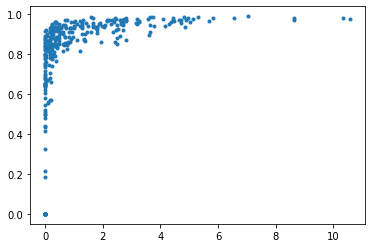

In [28]:
val_measures = np.max(R[:, :, 4, 4], axis=1)
plt.plot(model.dwell_time_,val_measures,'.')

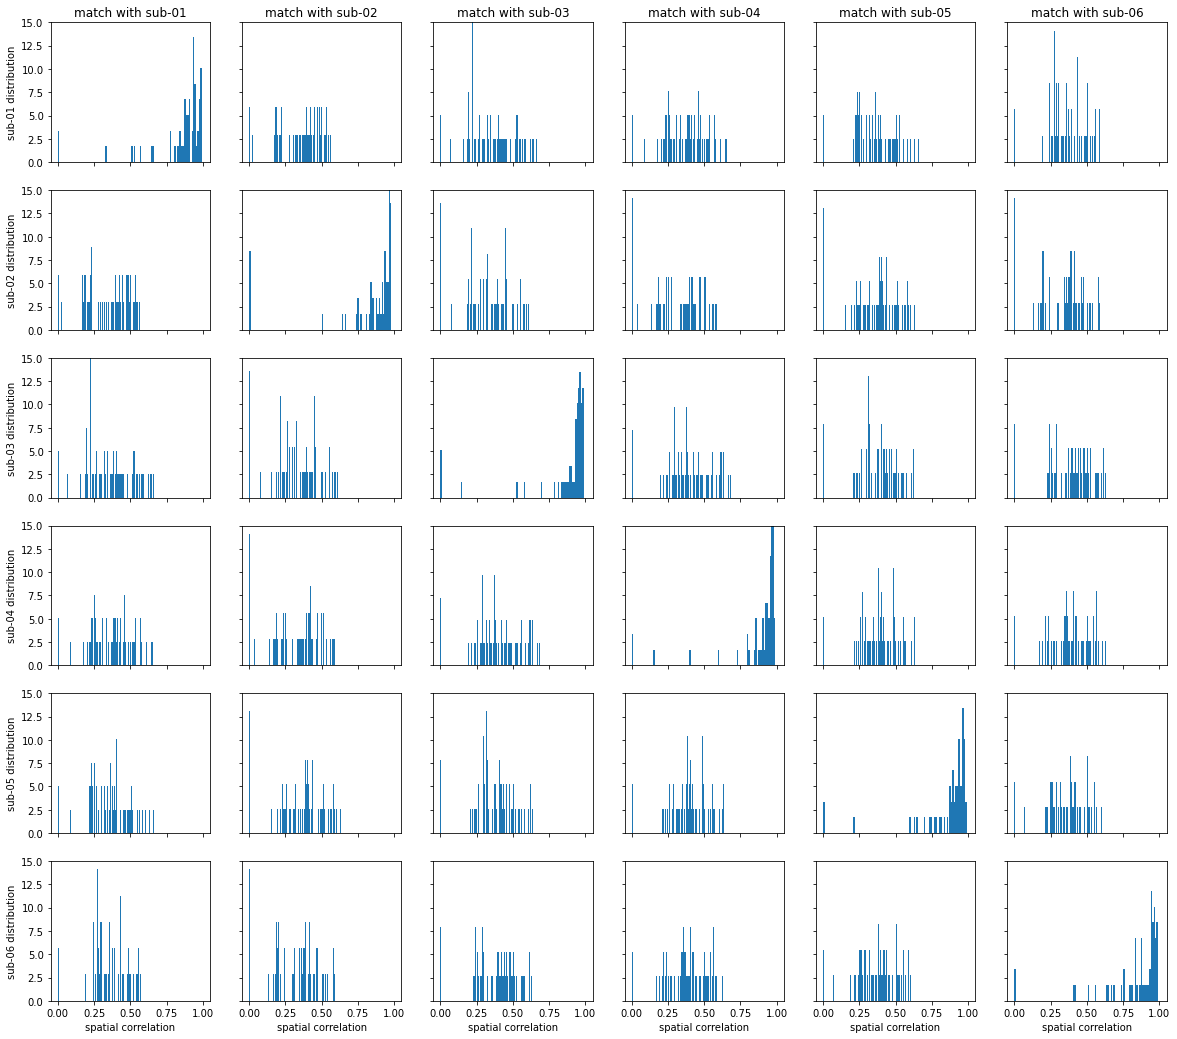

In [6]:
R = np.load(os.path.join(root_data,'Rmatch_fwhm-5_cluster-20_state-60.npy'))
visu_repro(R)

# fwhm-5 cluster-20 state-120

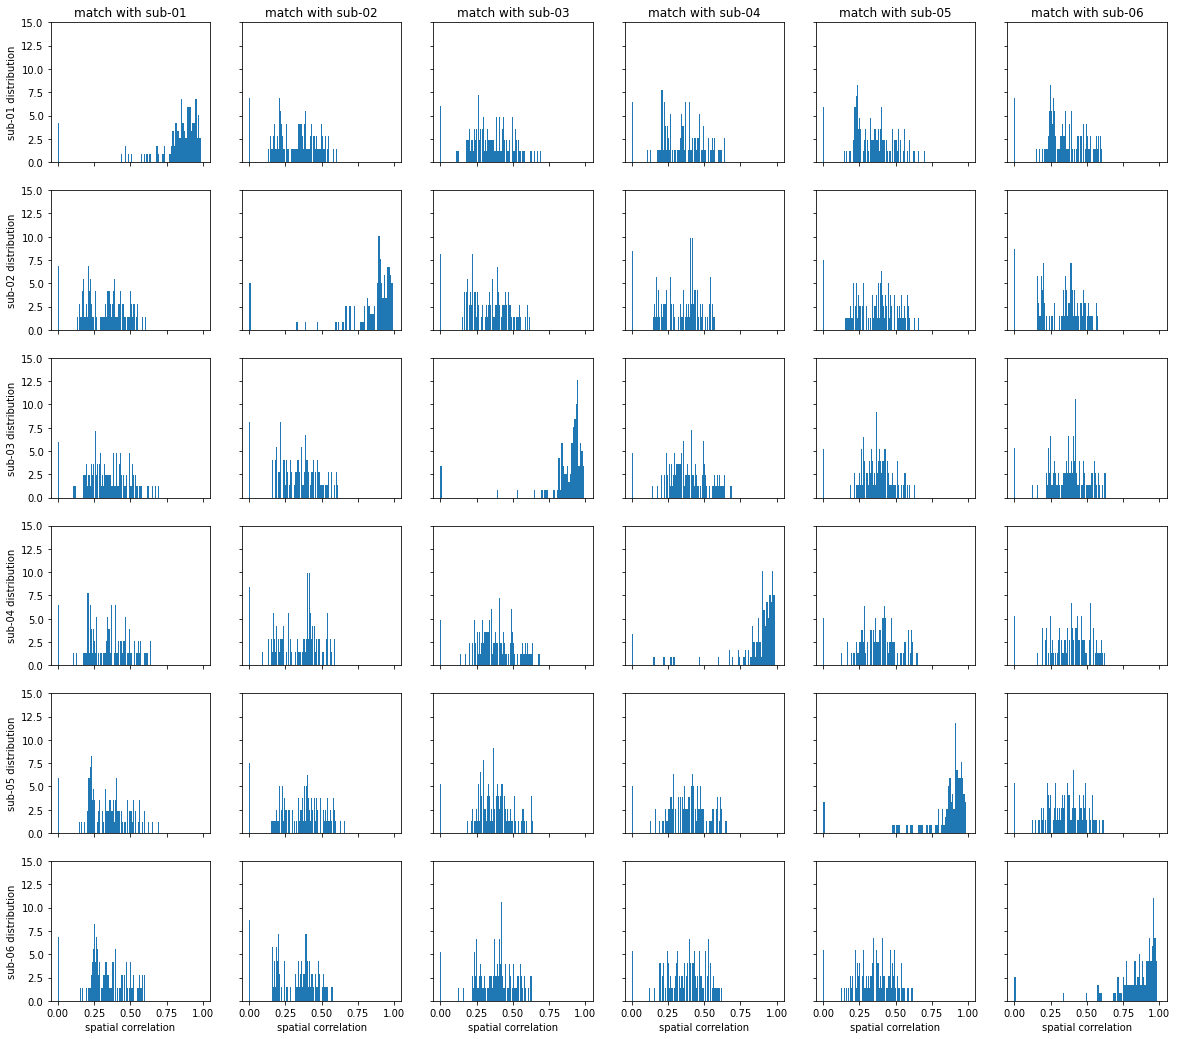

In [3]:
R = np.load('/data/cisl/pbellec/cneuromod_embeddings/xp_202012/friends-s01_reproducibility/Rmatch_fwhm-5_cluster-20_state-120.npy')
visu_repro(R)

# fwhm-5 cluster-50 state-150

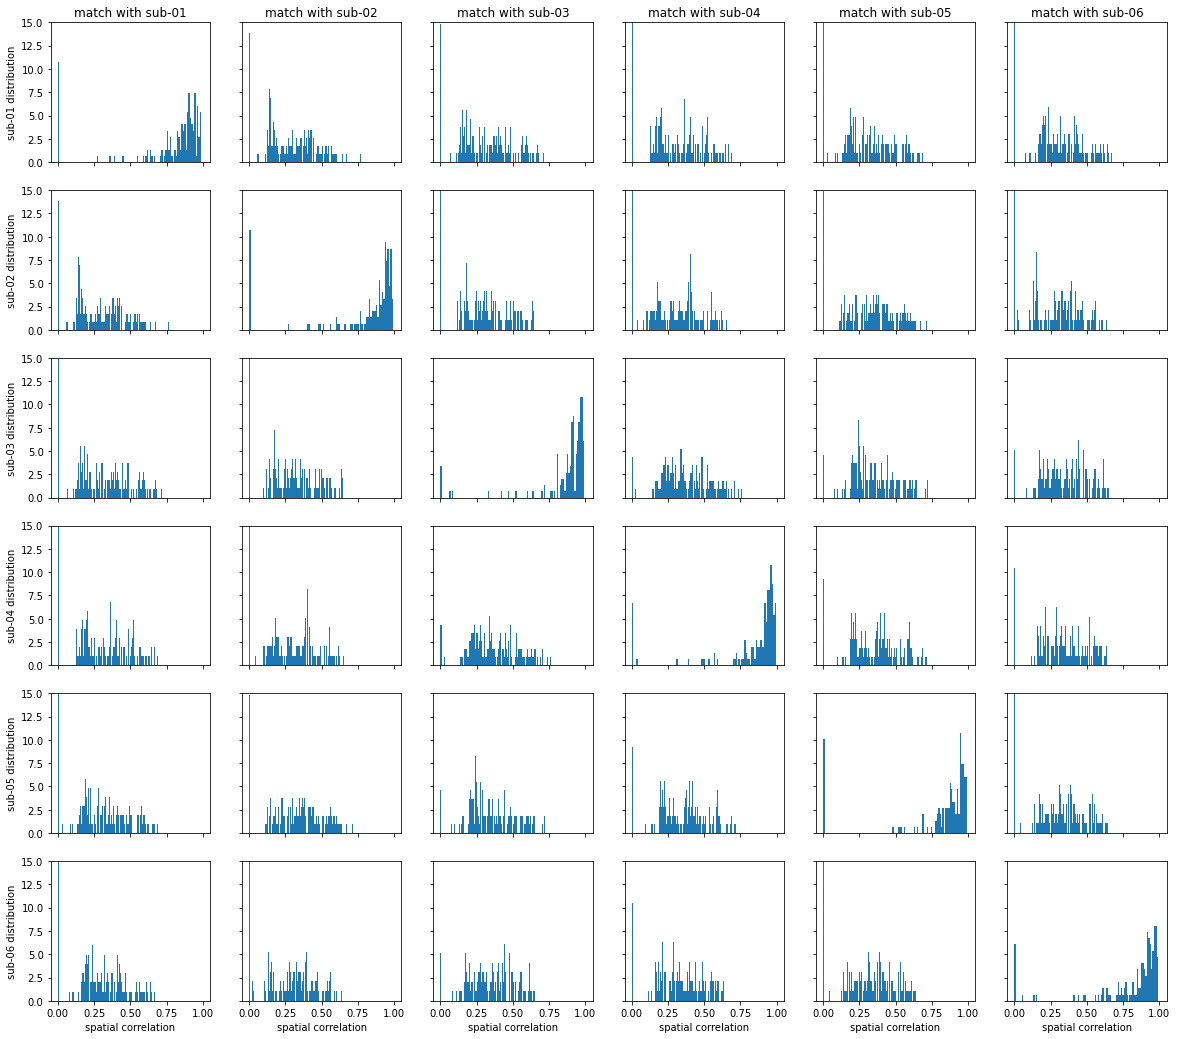

In [4]:
R = np.load('/data/cisl/pbellec/cneuromod_embeddings/xp_202012/friends-s01_reproducibility/Rmatch_fwhm-5_cluster-50_state-150.npy')
visu_repro(R)

# fwhm-5 cluster-50 state-300

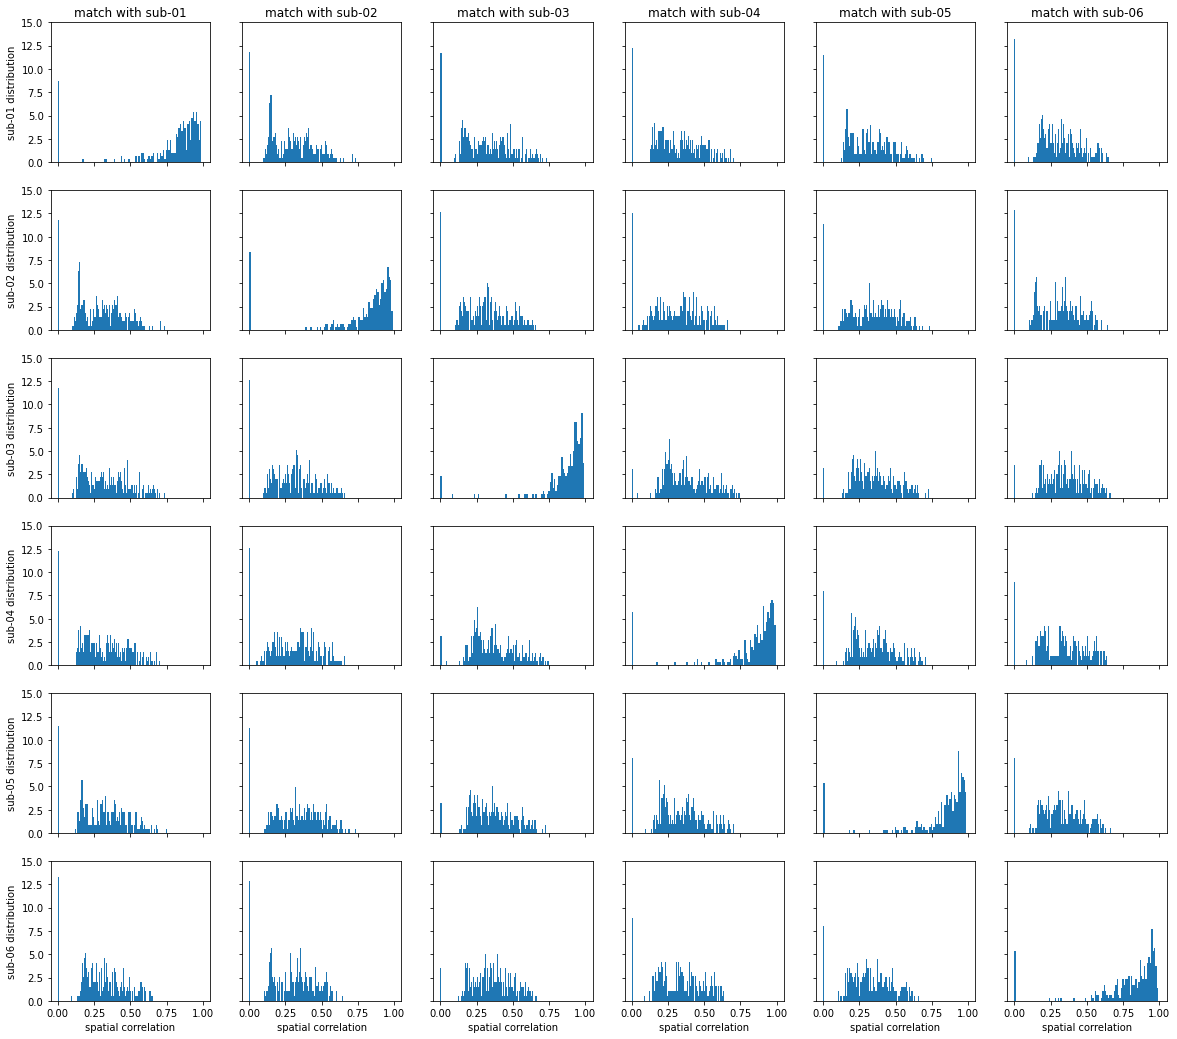

In [5]:
R = np.load('/data/cisl/pbellec/cneuromod_embeddings/xp_202012/friends-s01_reproducibility/Rmatch_fwhm-5_cluster-50_state-300.npy')
visu_repro(R)

# fwhm-5 cluster-30 state-900

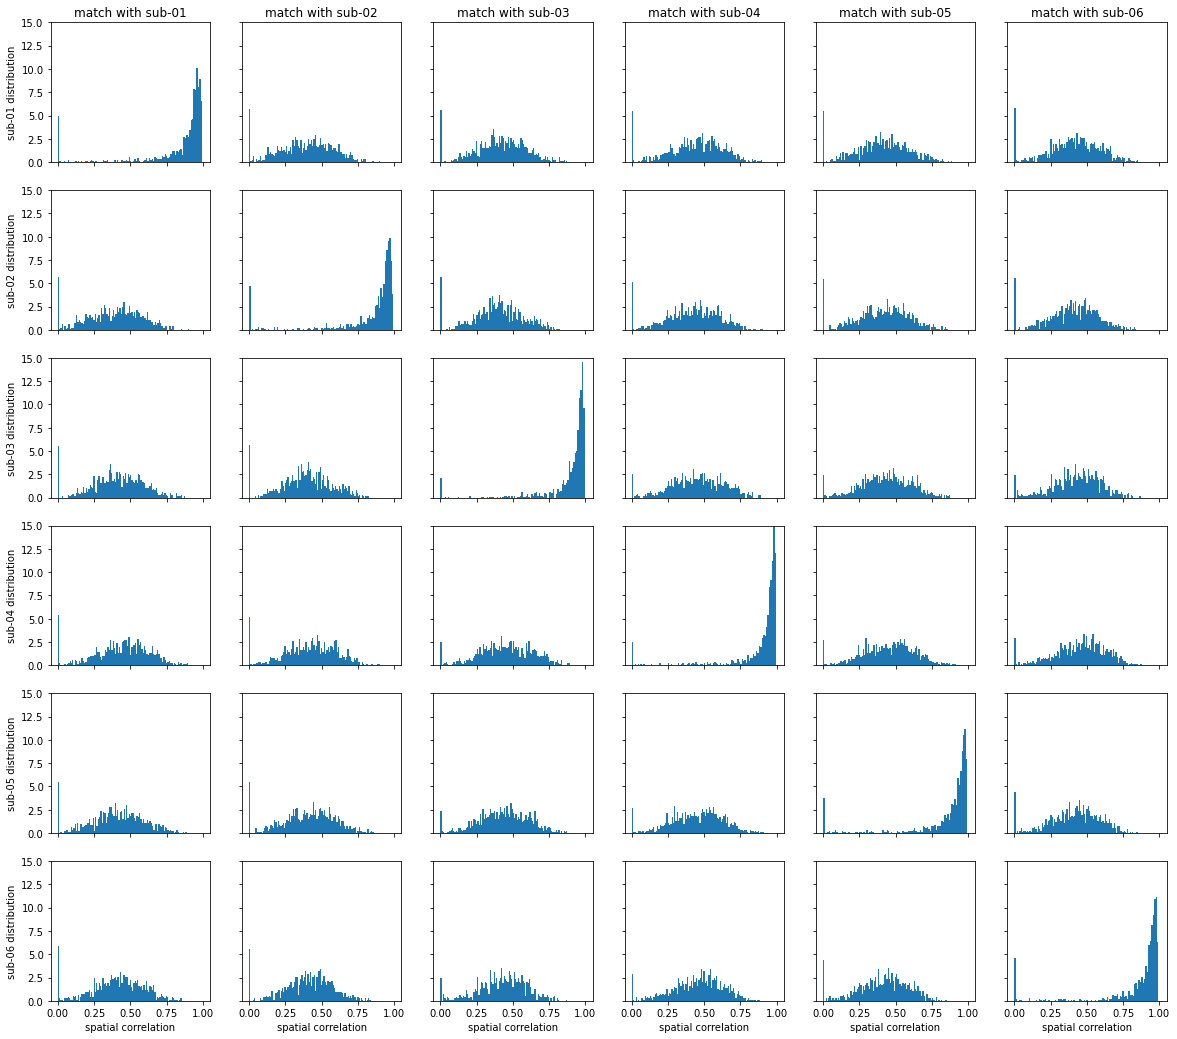

In [6]:
R = np.load('/data/cisl/pbellec/cneuromod_embeddings/xp_202012/friends-s01_reproducibility/Rmatch_fwhm-5_cluster-300_state-900.npy')
visu_repro(R)